# Assignment 3:  Bias & Variance (60 points)
## Due Thursday, Feburary 16, 2023 at 6PM
**Turning the .ipynb notebook, and a viewable version of the notebook, such as html or pdf.**


**This assignment aims to replicate the bias/variances figures 4.5 and 4.6 in section 4.7 of Alpaydin, deepening the understanding of bias and variance.**

## Question one (20 points)
**Replicate figures 4.5 in section 4.7 of Alpyadin 4th edition**

In [171]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**The ground thruth function for the regression is f(x) = 3 cos(2x)**

**Generate 100 sample datasets with f(x) + Gaussian white noise (N(0,1)). Each dataset will have 20 points randomly selected x from [0,5] with corresponding target points.**

In [172]:
# Ground truth target function
def f(x):
    return 3 * np.cos( 1.3 * x)

# seed
np.random.seed(62)
# x
x = np.random.uniform(0.0, 5.0, [100, 20])
x = np.sort(x)

# Ground truth targets
g = f(x)
# Add white noise
noisy = np.random.normal(0, 1, [100, 20])
# y
y = g + noisy

# use linspace(0,5,100) as test set to plot the images
x_test = np.linspace(0,5,100)




<strong>TODO: Use the First 5 datasets to generate 4 plots.</strong>
 - Figure one: Function f(x) = 3 cos(2x) and one noisy dataset sampled from the function, namely "Function, and data".
 - Figure two: Generate five polynomial fits of degree ONE based on the first five datasets and name this figure with "Order 1"
 - Figure three: Generate five polynomial fits of degree THREE based on the first five datasets and name this figure with "Order 3"
 - Figure four: Generate five polynomial fits of degree FIVE based on the first five datasets and name this figure with "Order 5"
 - For figures two, three, and four, please add a dotted line as an average line for the five fits.
  
  
<b> Please use x_test to plot all the model functions, not just the ground truth function. This will make all the higher polynomial models look smoother. </b>

<br>

<strong>Hint: You can use the Sklearn’s PolynomialFeatures and LinearRegression. </storng>
- https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions

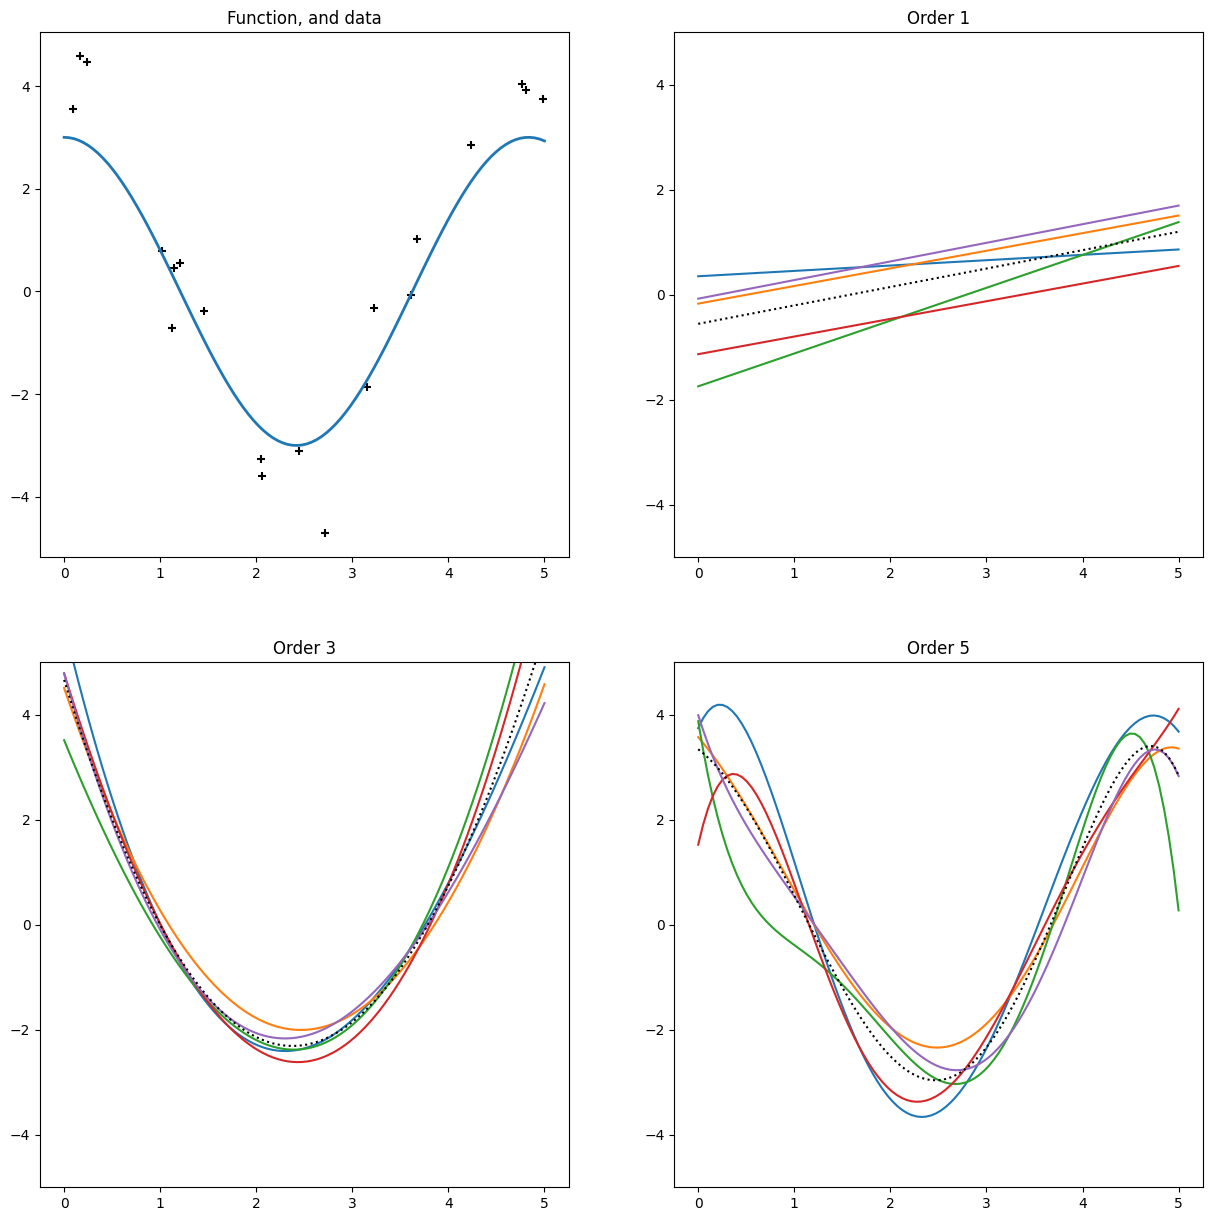

In [173]:
# model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline


def linear_model_predict(X, Y, order):
    # fit one polynomial model of degree `order`
    ## Insert your code BEGIN
    X= X[:, np.newaxis]
    Y= Y[:, np.newaxis]
    model = Pipeline([('poly', PolynomialFeatures(degree=order)), ('linear', LinearRegression(fit_intercept=False))])
    model.fit(X, Y)  
    ## Insert your code END
    return model

def plot_figure(x, y, x_test, order,k,j):
    # model = make_pipeline(PolynomialFeatures(order), Ridge(alpha=1e-3))
    y_avg=[]
    for i in range (5):
        model = linear_model_predict(x[i], y[i], order)
        y_plot = model.predict(X_test)
        axs[k,j].plot(x_test, y_plot, label=f"Order {order}")
        axs[k,j].set_title(f"Order {order}")
        y_avg.append(y_plot)
    y_avg = np.mean(y_avg, axis = 0) 
    axs[k,j].plot(x_test, y_avg, 'k:')
  
# show the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

X_test = x_test[:, np.newaxis]
# figure one
plt.subplot(2, 2, 1)
## Insert your code BEGIN
axs[0,0].plot(x_test, f(x_test),linewidth=2, label="ground truth")
axs[0,0].scatter(x[0], y[0] ,color = 'black', marker="+", label="training points")
axs[0,0].set_title("Function, and data")
## Insert your code END

# figure two
plt.subplot(2, 2, 2)
plt.ylim(-5, 5)
plot_figure(x, y, x_test, order=1,k=0,j=1)

# figure three
plt.subplot(2, 2, 3)
plt.ylim(-5, 5)
plot_figure(x, y, x_test, order=3,k=1,j=0)

# # figure four
plt.subplot(2, 2, 4)
plt.ylim(-5, 5)
plot_figure(x, y, x_test, order=5,k=1,j=1)

## Question 2 (40 points)

**TODO: Generate Figure 4.6 from Alpaydin 4th Edition**

**The x-axis is the order of polynomial model, from 1 to 5. the y-axis is the error. The plot should contain three curves: total error, bias error and variance error.**

**Use all 100 dataset to compute the total error, bias error and variance error functions by using total error equation (4.36): $Ex[(E[r|x]-g(x))^2|x] = (E[r|x]) - E_X(g(x))^2 + E_X[(g(x)-E_X[g(x)])^2]$**

**Evaluate each of the three error functions with 10 equally spaced values starting from 0 and ending at 5, i.e. np.linspace(0, 5, 10)**

**TODO: For each of the five polynomial models, print the average predictions, $E_X[g(x)]$, at np.linspace(0, 5, 10)**

**Hint: Average prediction at point x means computing the average value of the predictions of 100 models generated by 100 datasets. The point x should range from np.linspace(0, 5, 10)**


**TODO: Generate and print a DataFrame with 5 rows, one for each order and 4 columns. The 4 columns are:**
 * **Order**
 * **Bias error**
 * **Variance error**
 * **Total error**


**Hint: Average prediction at point x means computing the average value of the predictions of 100 models generated by 100 datasets. The point x should range from np.linspace(0, 5, 10)**

**Hint: For bias error $(E[r|x]) - E_X(g(x))^2$, $E[r|x] = f(x)$ and $E_X[g(x)]$ is the average over 100 models from the 100 datasets. Then, you can approximate bias error by average over x in np.linspace(0, 5, 10) of $(E[r|x] - E_X[g(x)])2$.**

**Hint: For For variance error, you need to have a nested loops (for each dataset and for  x in np.linespace(0, 5, 10))  to get the average variance error.**

**Hint: The total error is the sum of bias error and variance error.**



1


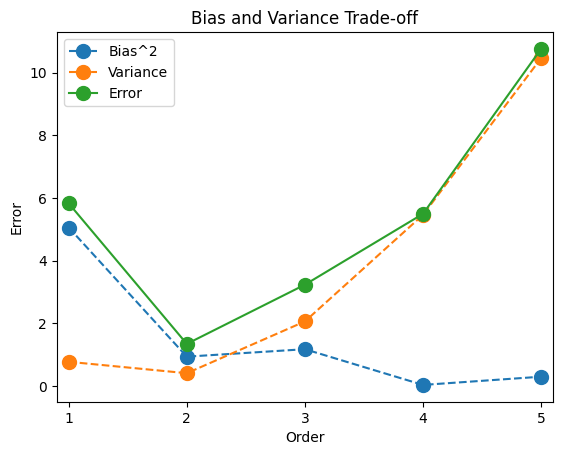

In [183]:
## Insert your code BEGIN
# Define any variables or methods that you need here
## Insert your code END  

def bias_error(avg_pred, x_eval):
    # For each polynomial order, computes its bias error
    # returns a list of length 5
    five_bias = []
    ## Insert your code BEGIN
    for i in range(5):
        biass =[]
        for j in range(10):
            bias = (f(x_eval[j])-avg_pred[i][j])**2
            biass.append(bias)
        avg_bias = np.mean(biass)
        five_bias.append(avg_bias)
    ## Insert your code END        
    return five_bias

def variance_error(avg_pred, models_evals):
    # For each polynomial order, computes its variance error
    # returns a list of length 5
    five_variance = []
    ## Insert your code BEGIN
    for i in range(5):
        varr =[]
        for j in range(100):
            for k in range(10):
                var_sig = (models_evals[i][j][k] - (avg_pred[i][k]))**2
                varr.append(var_sig)
        avg_var= np.mean(varr)
        five_variance.append(avg_var)
    ## Insert your code END  
    return five_variance


# Fit 5 * 100 models, i.e. fit 100 models for each degree in range(1, 6).
# The shape of models_list is (5, 100)
models_list = []
## Insert your code BEGIN
for order in range(1, 6):
    temp = []
    for i in range(100):
        model = Pipeline([('poly', PolynomialFeatures(degree=order)), ('linear', LinearRegression(fit_intercept=False))])
        model.fit(x[i][:, np.newaxis], y[i][:, np.newaxis])
        temp.append(model)

    models_list.append(temp)
## Insert your code END


# create evaluation x data 
x_eval = np.linspace(0, 5, 10)
X_eval = x_eval[:, np.newaxis]

# Evaluate each of the 5 * 100 models on `x_eval`
# The shape of models_evals_list is (5,100,10) which is 5 degree with 100 models and each model predict the 10 x evaluation
models_evals_list = []
## Insert your code BEGIN
for i in range(5):
    models_evals = []
    for j in range(100):
        model = models_list[i][j]
        y_plot = model.predict(X_eval)
        
        models_evals.append(y_plot)
    models_evals_list.append(models_evals)
## Insert your code END

# For each degree compute the average predictiona at `x_eval`
# The shape `ave_preds_list` isis (5,10) 

## Insert your code BEGIN
avg_preds_array = [np.mean(models_evals_i, axis=0) for models_evals_i in models_evals_list]
avg_preds_list = [avg_preds_array[i].tolist() for i in range(5) ]

print(len(avg_preds_list[0][0]))
## Insert your code END


bias_lst = bias_error(avg_preds_list, x_eval)

variance_lst = variance_error(avg_preds_list, models_evals_list)

total_error = [x + y for x, y in zip(bias_lst, variance_lst)]

# show the plot
x_points = [1,2,3,4,5]

plt.plot(x_points, bias_lst, linestyle='dashed',label = "Bias^2", marker='o', markersize=10)
plt.plot(x_points, variance_lst, linestyle='dashed', label = "Variance", marker='o', markersize=10)
plt.plot(x_points, total_error, linestyle='solid', label = "Error", marker='o', markersize=10)
plt.legend()
plt.xlim(0.9, 5.1)
plt.xticks(np.linspace(1, 5, 5))
plt.xlabel("Order")
plt.ylabel("Error")
plt.title("Bias and Variance Trade-off")
# Display graph
plt.show()



In [175]:
# Error DataFrame
pd.set_option("display.precision", 3)
error_df = pd.DataFrame({
    'Order': range(1,6),
    'Bias Error': bias_lst,
    'Variance Error': variance_lst,
    'Total Error': total_error
})
error_df

,Order,Bias Error,Variance Error,Total Error
0,1,5.058,0.771,5.829
1,2,0.935,0.407,1.343
2,3,1.173,2.060,3.233
3,4,0.033,5.462,5.495
4,5,0.296,10.464,10.760


In [184]:
# Average predictions
pd.set_option("display.precision", 3)
pd.DataFrame(avg_preds_list)

,0,1,2,3,4,5,6,7,8,9
0,[-0.3259976537090615],[-0.26263319489029546],[-0.19926873607152995],[-0.13590427725276416],[-0.07253981843399844],[-0.009175359615232694],[0.054189099203533056],[0.11755355802229882],[0.18091801684106454],[0.2442824756598302]
1,[4.458991787124212],[1.7718821666798388],[-0.22532831102262033],[-1.5326396459831633],[-2.1500518382017897],[-2.077564887678502],[-1.3151787944132962],[0.13710644159382443],[2.279290820342863],[5.111374341833813]
2,[5.176781364621132],[2.0268569442708317],[-0.2364434275357784],[-1.6550104685570728],[-2.2707348965514313],[-2.1255074292772305],[-1.2612187844928497],[0.2802403200433324],[2.4569791665729417],[5.227107037337597]
3,[2.983055452101186],[2.550332153215362],[0.5037275095187511],[-1.6308778349387751],[-2.856658835150349],[-2.70584604515211],[-1.2397256180231997],[0.9513606941142367],[2.7480155400950412],[2.50178596971105]
4,[1.3236282135803759],[2.120734523263692],[0.4419274665553282],[-1.6379054333756846],[-2.8604394153406076],[-2.6899159885106076],[-1.219146440796432],[0.9244846527720055],[2.673015921665938],[2.611905691478161]
